# 教学数据的Python实现

In [45]:
%matplotlib inline
# 数组
import numpy as np
# 生成稀疏矩阵 
from scipy.sparse import diags  
# 常微分方程 
from scipy.integrate import odeint, ode
# 线性代数法求本征值和本征矢
from scipy.sparse.linalg import eigs
from scipy.linalg import eig
# 傅里叶变换
from numpy.fft import fftfreq
from scipy.fftpack import *
# 有限差分数值导数和偏微分方程
from findiff import FinDiff
# 做图
import matplotlib.pyplot as plt


## diags法生成稀疏矩阵


In [32]:
diagonals = [[1,1,1,1], [1,2,3],[4,5]]
A_diag = diags(diagonals, [-4, 5, 6],shape=(8, 8)).toarray()

## eigs法求本征值和本征矢

求矩阵A的k个特征值和特征矢

`scipy.sparse.linalg.eigs(A, k=6, M=None, sigma=None, which='LM', v0=None, ncv=None, maxiter=None, tol=0, return_eigenvectors=True, Minv=None, OPinv=None, OPpart=None)`

In [33]:
A_unit= np.eye(8)
eigenval, eigenvec = eigs(A_unit,k=6)

In [34]:
eigenval.real

array([1., 1., 1., 1., 1., 1.])

In [35]:
eigenval, eigenvec = eigs(A_diag,k=6)

In [36]:
eigenval

array([-0.01195917+0.00496435j, -0.01195917-0.00496435j,
       -0.00492849+0.01195851j, -0.00492849-0.01195851j,
        0.00496278+0.01192424j,  0.00496278-0.01192424j])

## 空间与函数的离散化


In [37]:
x = np.linspace(-1, 1, 100)
f = np.sin(x)  # as an example

## FinDiff求导数

FinDiff(axis, spacing, degree)

In [38]:
x = np.linspace(-np.pi, np.pi, 100)
dx = x[1]-x[0]
f = np.sin(x)  # as an example

# Define the derivative:
d_dx = FinDiff(0, dx, 1, acc=4)
d2_dx2 = FinDiff(0, dx, 2, acc=6)

# Apply it:
df_dx = d_dx(f)
d2f_dx2 = d2_dx2(f)

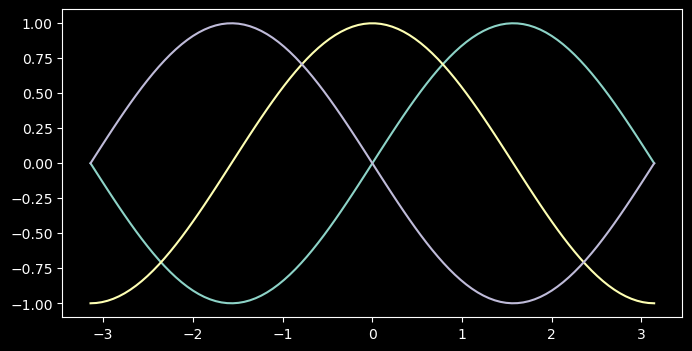

In [39]:
fig = plt.figure(figsize=(8,4), dpi=100)
plt.plot(x,f,x,df_dx,x,d2f_dx2)
plt.show()


## 解一维谐振子

定态薛定谔方程
$$ \hat{H}\Psi = E \Psi $$
这是哈密顿量的本征方程
$$ \begin{aligned}
    H &= T + V \\ 
    &= - \frac{\hbar ^2}{2 m} \frac{\partial ^2 }{\partial x^2 } + \frac{1}{2} \omega ^2 x^2
\end{aligned} $$



In [52]:
x = np.linspace(-6, 6, 201)
dx = x[1]-x[0]
d2_dx2 = FinDiff(0, dx, 2)

hbar = 1
m = 1 
omega = 1 
H = -hbar**2/(2*m)*d2_dx2.matrix(x.shape) + diags(1/2*omega*x**2)

[0.5 1.5 2.5 3.5 4.5]


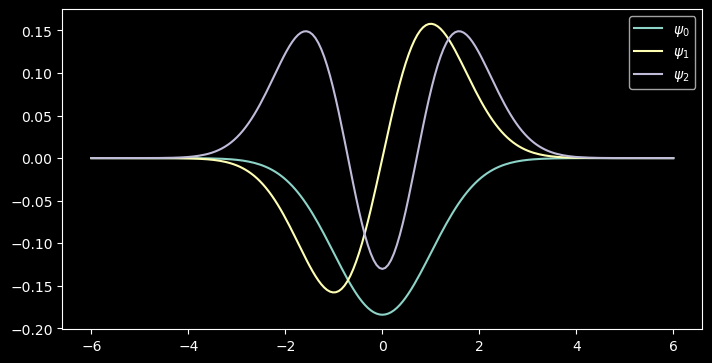

In [47]:
eigenval, eigenvec = eigs(H,k=10,which='SR')
print(np.around(eigenval[:5].real, 2))

fig = plt.figure(figsize=(8,4), dpi=100)
axes = fig.add_axes([0.0, 0.0, 0.8, 0.8]) 
axes.plot(x,eigenvec[:,0].real, label="$\psi_0$")
axes.plot(x,eigenvec[:,1].real, label="$\psi_1$")
axes.plot(x,eigenvec[:,2].real, label="$\psi_2$")
axes.legend()
plt.show()
#fig.savefig("EM/EM-beamer/figs/qm-harmonic-oscillator.svg")


## 阻尼振子

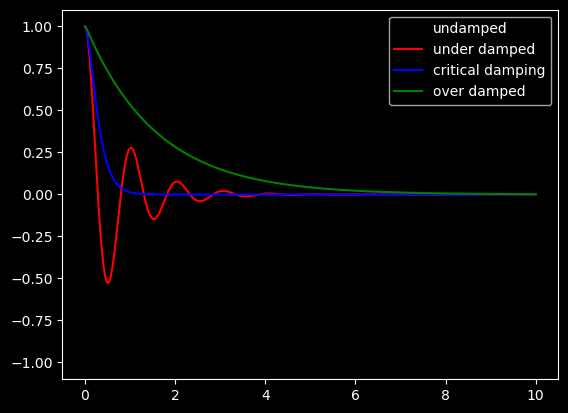

In [26]:
def dy(y, t, zeta, w0):
    """
    The right-hand side of the damped oscillator ODE
    """
    x, p = y[0], y[1]
    
    dx = p
    dp = -2 * zeta * w0 * p - w0**2 * x

    return [dx, dp]
# initial state: 
y0 = [1.0, 0.0]

# time coodinate to solve the ODE for
t = np.linspace(0, 10, 1000)
w0 = 2*np.pi*1.0

# solve the ODE problem for three different values of the damping ratio

y1 = odeint(dy, y0, t, args=(0.0, w0)) # undamped
y2 = odeint(dy, y0, t, args=(0.2, w0)) # under damped
y3 = odeint(dy, y0, t, args=(1.0, w0)) # critial damping
y4 = odeint(dy, y0, t, args=(5.0, w0)) # over damped

fig, ax = plt.subplots()
ax.plot(t, y1[:,0], 'k', label="undamped", linewidth=0.25)
ax.plot(t, y2[:,0], 'r', label="under damped")
ax.plot(t, y3[:,0], 'b', label=r"critical damping")
ax.plot(t, y4[:,0], 'g', label="over damped")
ax.legend(loc=1);
fig.savefig("EM/EM-beamer/figs/damped.svg")

# Fourier transform

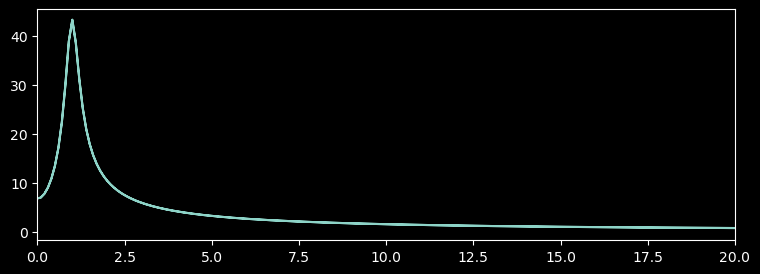

In [28]:
from numpy.fft import fftfreq
from scipy.fftpack import *

N = len(t)
dt = t[1]-t[0]

# calculate the fast fourier transform
# y2 is the solution to the under-damped oscillator from the previous section
F = fft(y2[:,0]) 
# F = fft(y1) 

# calculate the frequencies for the components in F
w = fftfreq(N, dt)

indices = np.where(w > 0) # select only indices for elements that corresponds to positive frequencies
w_pos = w[indices]
F_pos = F[indices]

fig, ax = plt.subplots(figsize=(9,3))
ax.plot(abs(w), abs(F));
ax.set_xlim(0, 20);

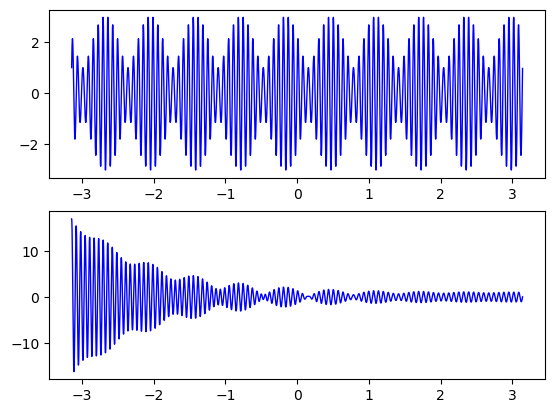

In [4]:
import numpy as np
import matplotlib.pyplot as plt
ax1 =plt.subplot(211)
ax2 =plt.subplot(212)
x = np.arange(- np.pi, np.pi, 0.001)
y1 = np.cos(x*100)+ 2*np.sin(x*90)
y2 = np.exp(-0.9*x)*np.cos(x*100)+ np.sin(x*90)

ax1.plot(x, y1, linewidth=1.0, color='b')
ax2.plot(x, y2, linewidth=1.0, color='b')
#plt.savefig("EM/EM-beamer/figs/my.svg")
plt.show();

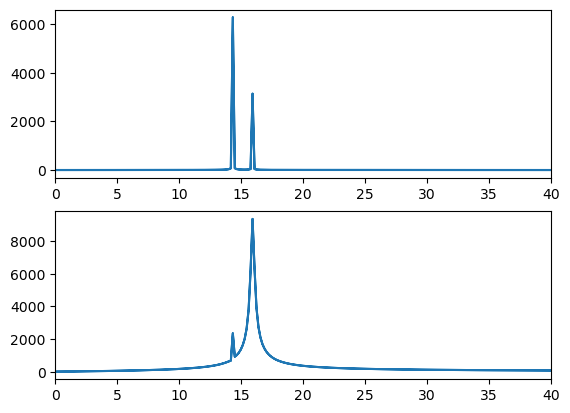

In [7]:
from numpy.fft import fftfreq
from scipy.fftpack import *

N = len(x)
dt = x[1]-x[0]

# calculate the fast fourier transform
# y2 is the solution to the under-damped oscillator from the previous section
# F = fft(y2[:,0]) 
F1 = fft(y1) 
F2 = fft(y2) 

# calculate the frequencies for the components in F
w = fftfreq(N, dt)

ax1 =plt.subplot(211)
ax2 =plt.subplot(212)

ax1.plot(abs(w), abs(F1));
ax1.set_xlim(0, 40);
ax2.plot(abs(w), abs(F2));
ax2.set_xlim(0, 40);

#plt.savefig("EM/EM-beamer/figs/fft.svg")

Text(1.6, 0.5, '$r$')

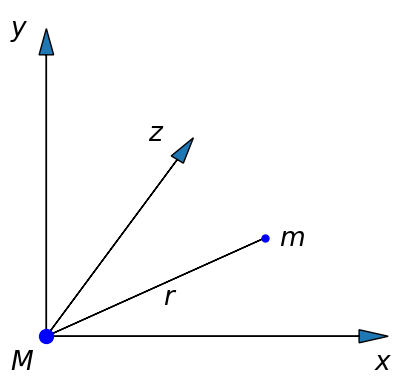

In [8]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(5,4.5))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.set_xticks([])
ax.set_yticks([])
ax.spines[:].set_visible(False)

plt.xlim(-0.5,5)
plt.ylim(-0.5,5)

ax.arrow(0, 0, 0, 4.3, head_width = 0.2, head_length = 0.4)
ax.text(-0.5, 4.6, r"$y$", fontsize=19)

ax.arrow(0, 0, 4.3, 0, head_width = 0.2, head_length = 0.4)
ax.text(4.5, -0.5, r"$x$", fontsize=19)

ax.arrow(0, 0, 1.8, 2.7,  head_width = 0.2, head_length = 0.4)
ax.text(1.4, 3.0, r"$z$", fontsize=19)


plt.plot(3.0,1.5, 'b', marker = "o",markersize=5)
ax.text(3.2,1.4, r"$m$", fontsize=19)
plt.plot(0,0, 'b', marker = "o",markersize=10)
ax.text(-0.5,-0.5, r"$M$", fontsize=19)

ax.arrow(0, 0, 3.0,1.5)
ax.text(1.6, 0.5, r"$r$", fontsize=19)

#plt.savefig("EM/EM-beamer/figs/my2.svg")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


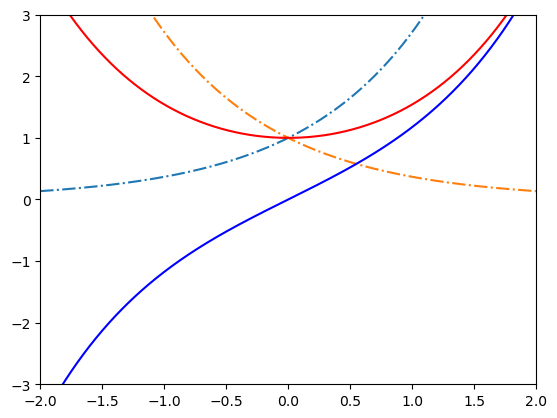

In [9]:
x = np.arange(- 2, 2, 0.001)
plt.plot(x, np.exp(x), '-.',label=r"$e^x$")
plt.plot(x, np.exp(-x), '-.',label=r"$e^{-x}$")
plt.plot(x, np.cosh(x),'r',label=r"$cosh(x)$")
plt.plot(x, np.sinh(x),'b',label=r"$sinh(x)$")

plt.xlim(-2,2)
plt.ylim(-3,3)
ax.arrow(0, 0, 0, 3)
ax.arrow(0, 0, 0, -3)
ax.arrow(0, 0, 2, 0)
ax.arrow(0, 0, -2, 0)

ax.legend();

# plt.savefig("EM/EM-beamer/figs/my3.svg")